# QTM531 Assignment 1
## Ao Lyu(Lorna)

In this assignment, I will use the Formula 1 dataset. Formula 1 is an international car racing competition, where drivers from all over the world compete for a title, and where individual races take place across different countries. Each driver is part of a team called a “Constructor”, typically sponsored by a specific car manufacturer.

More information will be shown in these link: 

https://en.wikipedia.org/wiki/Formula_One

https://www.kaggle.com/datasets/rohanrao/formula-1-world-championship-1950-2020

### a) Which three constructors had the highest number of total points between 1981 and 2020? How many total points did each of them get? How do the total number of points for each constructor compare to the average across constructors?

From the questions, we need to use **races table** to get the years and raceID, and use **constructor_results** to get the points, and use **constructors** to identify constructor names. 

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
# Load the datasets
races = pd.read_csv('data_raw/races.csv')
constructor_results = pd.read_csv('data_raw/constructor_results.csv')
constructors = pd.read_csv('data_raw/constructors.csv')

# View the datasets
races.head(), constructor_results.head(), constructors.head()

(   raceId  year  round  circuitId                   name        date  \
 0       1  2009      1          1  Australian Grand Prix  2009-03-29   
 1       2  2009      2          2   Malaysian Grand Prix  2009-04-05   
 2       3  2009      3         17     Chinese Grand Prix  2009-04-19   
 3       4  2009      4          3     Bahrain Grand Prix  2009-04-26   
 4       5  2009      5          4     Spanish Grand Prix  2009-05-10   
 
        time                                                url fp1_date  \
 0  06:00:00  http://en.wikipedia.org/wiki/2009_Australian_G...       \N   
 1  09:00:00  http://en.wikipedia.org/wiki/2009_Malaysian_Gr...       \N   
 2  07:00:00  http://en.wikipedia.org/wiki/2009_Chinese_Gran...       \N   
 3  12:00:00  http://en.wikipedia.org/wiki/2009_Bahrain_Gran...       \N   
 4  12:00:00  http://en.wikipedia.org/wiki/2009_Spanish_Gran...       \N   
 
   fp1_time fp2_date fp2_time fp3_date fp3_time quali_date quali_time  \
 0       \N       \N       \N

In [24]:
# Filter races for the years 1981-2020
filtered_races_1981_2020 = races[(races['year'] >= 1981) & (races['year'] <= 2020)]

In [25]:
# Chaining to get aggregate teamrace with raceId
teamrace_agg_names_1981_2020 = (constructor_results.query("raceId in @filtered_races.raceId")
                                  .groupby("constructorId")
                                  .agg(total_points = ('points', 'sum'),
                                       mean_points = ('points', 'mean'),
                                       count_races = ('points', 'count')))

In [26]:
# Merge with constructors to get names
teamrace_agg_names_1981_2020 = pd.merge(teamrace_agg, constructors[['constructorId', 'name']], on='constructorId')

# Find top three constructors
teamrace_agg_top3_1981_2020 = teamrace_agg_names_1981_2020.sort_values(by='total_points', ascending=False).head(3)

teamrace_agg_top3_1981_2020

,constructorId,total_points,mean_points,count_races,name
5,6,7374.0,10.640693,693,Ferrari
56,131,5685.0,26.441860,215,Mercedes
0,1,5229.5,7.557081,692,McLaren


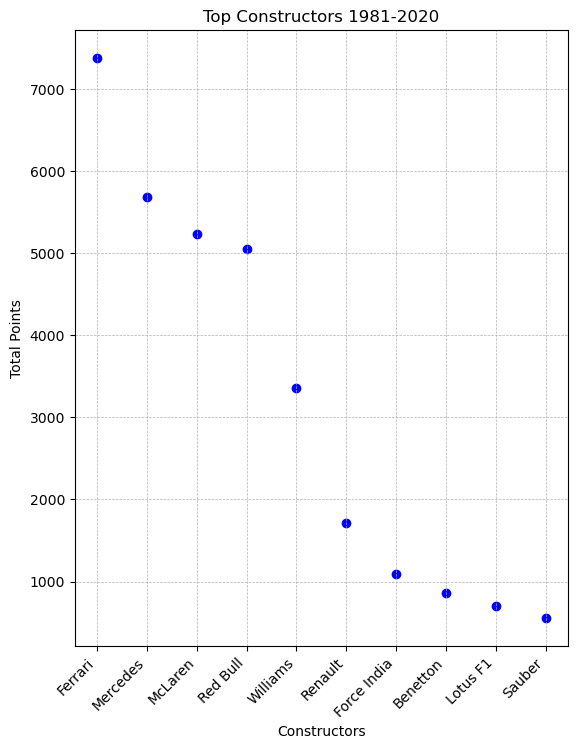

In [27]:
# Sort by total points for graphing
sorted_1981_2020 = teamrace_agg_names_1981_2020.sort_values(by='total_points', ascending=False).head(10)

# Plotting
plt.figure(figsize=(14, 8))

# 1981-2020
plt.subplot(1, 2, 1)
plt.scatter(sorted_1981_2020['name'], sorted_1981_2020['total_points'], color='blue', label='1981-2020')
plt.title('Top Constructors 1981-2020')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Total Points')
plt.xlabel('Constructors')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

### Conclusion
    The top 3 constructors with the highest number of total points are :Ferrari with a total of 7,374 points, Mercedes with a total of 5,685 points and McLaren with a total of 5,229.5 points.

    The average number of points per race are: Ferrari was 10.64, Mercedes was 26.44, and McLaren had an average of 7.56 points per race.

    Therefore, the totals significantly exceed the overall average points per race for all constructors, indicating that they were exceptionally successful in accumulating points during the specified period. Mercedes' average points per race are particularly notable for being significantly higher than Ferrari's and McLaren's.

### b) Which three constructors had the highest number of total points between 2001 and 2020? How many total points did each of them get? How do the total number of points for each constructor compare to the average across constructors?

In this question, we can still use the dataset above, and just need to change our year subset.

In [21]:
# Filter races for the years 2001-2020
filtered_races_2001_2020 = races[(races['year'] >= 2001) & (races['year'] <= 2020)]

# Using the provided template to aggregate constructor results within the years 2001-2020
teamrace_agg_2001_2020 = (constructor_results.query("raceId in @filtered_races_2001_2020.raceId")
                                                .groupby("constructorId")
                                                .agg(total_points = ('points', 'sum'),
                                                     mean_points = ('points', 'mean'),
                                                     count_races = ('points', 'count')))

In [22]:
# Merge with constructors to get names
teamrace_agg_names_2001_2020 = pd.merge(teamrace_agg_2001_2020, constructors[['constructorId', 'name']], on='constructorId')

# Sort by total points to find top three constructors
teamrace_agg_top3_2001_2020 = teamrace_agg_names_2001_2020.sort_values(by='total_points', ascending=False).head(3)

teamrace_agg_top3_2001_2020

,constructorId,total_points,mean_points,count_races,name
5,6,5862.0,15.758065,372,Ferrari
24,131,5685.0,26.441860,215,Mercedes
8,9,5043.5,16.590461,304,Red Bull


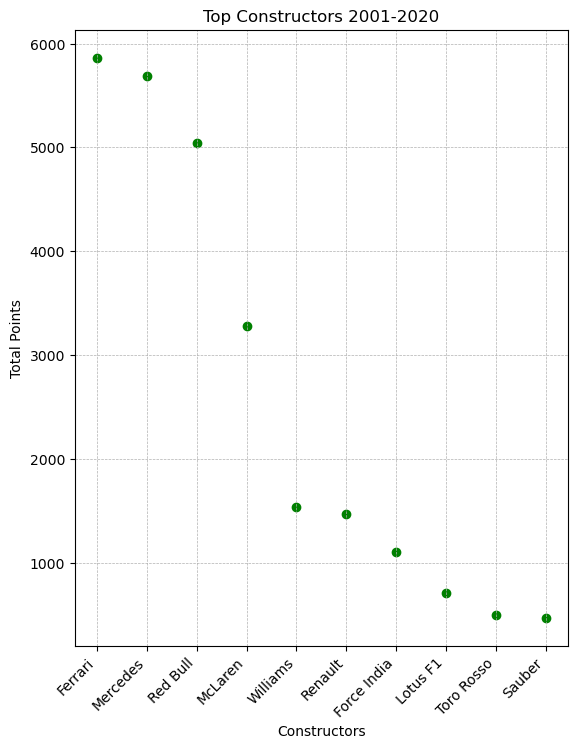

In [30]:
# Sort by total points for graphing
sorted_2001_2020 = teamrace_agg_names_2001_2020.sort_values(by='total_points', ascending=False).head(10)

# Plotting
plt.figure(figsize=(14, 8))

# 2001-2020
plt.subplot(1, 2, 2)
plt.scatter(sorted_2001_2020['name'], sorted_2001_2020['total_points'], color='green', label='2001-2020')
plt.title('Top Constructors 2001-2020')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Total Points')
plt.xlabel('Constructors')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

### Conclusion
    The top 3 constructors with the highest number of total points are :Ferrari with a total of 5,862 points, Mercedes with a total of 5,685 points, and Red Bull with a total of 5,043.5 points.

    The average number of points per race are: Ferrari was 15.76, Mercedes was 26.44, and Red Bull had an average of 16.59 points per race.

    Therefore, the totals significantly exceed the overall average points per race for all constructors, indicating that they were exceptionally successful in accumulating points during the specified period.And Mercedes even showcased an higher average points per race than the earlier period(1981-2020), indicating periods of intense dominance in the sport.

### c) How did the rankings change across the two time periods?

    Ferrari's and Mercedes' remains for the first one and the second one. But the third ranking changed from McLaren's to Red Bull.

### d) How many different drivers did Ferrari have between 1981 and 2020?

In this questions, I would like to add **drivers** and **result** datasets to get the drivers information and race results. 

In [17]:
# Load datasets
drivers = pd.read_csv('data_raw/drivers.csv')
results = pd.read_csv('data_raw/results.csv')

In [32]:
# Filter for Ferrari's 
ferrari_constructor_id = constructors[constructors['name'] == 'Ferrari']['constructorId'].iloc[0]

# Filter races between 1981 and 2020
filtered_races_ids = races[(races['year'] >= 1981) & (races['year'] <= 2020)]['raceId']

# Filter results for these races and for Ferrari
ferrari_results = results[(results['raceId'].isin(filtered_races_ids)) & 
                        (results['constructorId'] == ferrari_constructor_id)]

# Count unique drivers 
unique_ferrari_drivers = ferrari_results['driverId'].nunique()

unique_ferrari_drivers

25

### Conclusion
    There are 25 different drivers that Farrari's has from 1981 to 2020.

### e) What was the best year for Ferrari between 1981 and 2020?

In [36]:
# Load the datasets
constructor_standings = pd.read_csv('data_raw/constructor_standings.csv')

In [37]:
# Filter constructor standings for Ferrari
ferrari_standings = constructor_standings[constructor_standings['constructorId'] == ferrari_constructor_id]
ferrari_standings_with_year = ferrari_standings.merge(filtered_races_1981_2020[['raceId', 'year']], on='raceId', how='left')

In [46]:
# Step 3: Aggregate Ferrari's performance by year
ferrari_yearly_performance = (ferrari_standings_with_year_df.groupby('year')
                                                          .agg(total_points=('points', 'sum'),
                                                               mean_points=('points', 'mean'),
                                                               wins=('wins', 'sum'),
                                                               count_races=('raceId', 'nunique')))

# Identify the year with the highest points and wins
best_year_by_points = ferrari_yearly_performance.loc[ferrari_yearly_performance['total_points'].idxmax()]
best_year_by_wins = ferrari_yearly_performance.loc[ferrari_yearly_performance['wins'].idxmax()]

# Display the best years based on points and wins
print("Best Year by Points:", best_year_by_points['year'], "with", best_year_by_points['total_points'], "points")
print("Best Year by Wins:", best_year_by_wins['year'], "with", best_year_by_wins['wins'], "wins")

Best Year by Points: 2018.0 with 6377.0 points
Best Year by Wins: 2004.0 with 152.0 wins


### Conclusion

    In 2018, Farrari has the highest points, and in 2004, Farrari won the most. Therefore, these are all the best year according to different standard. 